# Introduction to Time Series Forecasting

A **time series** is a sequence of data points that occur in successive order over some period of time. 

A time series can be **yearly** (for example, an annual budget), **quarterly** (for example, expenses), **monthly** (for example, air traffic), **weekly** (for example, sales quantity), **daily** (for example, weather), **hourly** (for example, stock prices), **minutes** (for example, inbound calls in a call centre), or even **seconds** in length, depending on the frequency (ex: web traffic).

Forecasting is the next step in the process, and it involves predicting the series' future values. When you generate scientific forecasts based on historical time stamped data, you're doing **time series forecasting**. It entails developing models based on previous data and applying them to make observations and guide future strategic decisions. A key distinction in forecasting is that the future outcome is completely unknown at the time of the work and can only be anticipated by meticulous analysis and evidence-based priors.

Now forecasting a time series can be broadly divided into two types.

- **Univariate Time Series Forecasting** is when you utilise only the prior values of a time series to predict its future values.

**For example** Here we have to forecast close price, so we are taking only past close prices to forecast prices in upcoming days

| Close | 
| --- | 
| 67.405298 | 
| 68.459983 |
| 69.785998 | 
| 70.225955 | 
| 65.345345 | 
| 68.353453 | 
| 69.345347 | 

--------------------------------

- **Multi Variate Time Series Forecasting** is when you employ predictors other than the series (also known as exogenous variables) to forecast.

**For example** Here close price value is dependent on open, high and low price values so we can use all these as features to fit our multivariate model and forecast close price value. 

| Close | Open | High | Low |
| --- | --- | --- | --- |
| 67.405998 | 70.123879 | 70.234878 | 66.438729 |
| 68.673246 | 71.237498 | 71.349828 | 67.278949	|
| 69.378432 | 72.892348 | 73.238947 | 68.298137	|
| 70.482379 | 71.782687 | 71.172838 | 66.982374	|
| 65.238973 | 74.928749 | 75.823890 | 63.287343	|
| 68.289349 | 75.389724 | 76.982479 | 66.248789	|
| 69.732878 | 78.287389 | 79.983789 | 65.737999	|

<hr style="border:1px solid black"> </hr>

#  Introduction to ARIMA Models

ARIMA models are a type of statistical model that can be used to analyse and forecast time series data. It gives a simple yet powerful way for creating time series forecasts by explicitly catering to a set of common structures in time series data.

ARIMA is an acronym for **AutoRegressive Integrated Moving Average**. It's a more complex version of the AutoRegressive Moving Average, with the addition of integration.


An ARIMA model is characterized by 3 terms: p, d, q
where,

- **p** is the order of the AR term. The number of lag observations included in the model, also called the lag order.

- **q** is the size of the moving average window, also called the order of moving average.

- **d** is the number of differencing required to make the time series stationary.

**What does ARIMA(p, d, q) mean?** 

For example :

- ARIMA(1, 0, 3) signifies that you're combining a 1st order Auto-Regressive model and a 3rd order Moving Average model to describe some response variable (Y) in your model. It's a good idea to think about it this way: (AR, I, MA). In simple words, this gives your model the following appearance:

    Y = (Auto-Regressive Parameters) + (Moving Average Parameters)

    The 0 between the 1 and the 3 represents the 'I' part of the model (the Integrative component), which denotes a model that takes the difference between response variable data - this can be done with non-stationary data, but you don't appear to be dealing with that, so ignore it.


- ARIMA(2, 1, 2) signifies that you're combining a 2nd order AR model and also a 2nd order MA model to describe Y. d = 1st denotes that the model used 1 order differencing to make the data stationary.

Just like these examples we have to find perfect order of p, d and q to fit the best model.

**There are a number of ways to find values of p, q and d:**

- look at an autocorrelation graph of the data (will help if Moving Average (MA) model is appropriate)
- look at a partial autocorrelation graph of the data (will help if AutoRegressive (AR) model is appropriate)
- look at extended autocorrelation chart of the data (will help if a combination of AR and MA are needed)
- try Akaike's Information Criterion (AIC) on a set of models and investigate the models with the lowest AIC values
- try the Schwartz Bayesian Information Criterion (BIC) and investigate the models with the lowest BIC values
-------------------------------
Before working with non-stationary data, the Autoregressive Integrated Moving Average (ARIMA) Model converts it to stationary data. One of the most widely used models for predicting linear time series data is this one.

The ARIMA model has been widely utilized in banking and economics since it is recognized to be reliable, efficient, and capable of predicting short-term share market movements.


<hr style="border:1px solid black"> </hr>

**Problem Statement** : In this notebook, we are going to use the **ARIMA**, **SARIMA** and **Auto ARIMA** model to forecast the stock price of **Happiest Mind Stock**.
<hr style="border:1px solid black"> </hr>

## Import the necessary libraries

In [1]:
"""Install these two libraries if not instlled already"""
!pip install pmdarima
!pip install yfinance

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [3]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import yfinance as yf
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.graphics.tsaplots import acf,pacf
import warnings
warnings.filterwarnings('ignore')
!pip install yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

We are using historical prices of 3 year (12/2018 - 12/2021) for Tesla stock.

In [11]:
ticker = "ADANIENT.NS"

try:
    df = yf.download(ticker, period="5y")  # Fetch last 5 years' data
except Exception as e:
    print(f"Error fetching data: {e}")
    exit()

if df.empty or df["Close"].isnull().all():
    print("Stock data is unavailable for this period.")
    exit()

[*********************100%***********************]  1 of 1 completed


In [7]:
# As we are performing UniVariate Time Series Analysis so we will conside only close price.
df = df[['Close']] # filtering the dataframe to date and close price

TypeError: 'Ticker' object is not subscriptable

In [9]:
df.info()

TypeError: 'NoneType' object is not callable

In [15]:
"""Convert to datetime, if the data is not in datetime format"""
# stock_data.Date = pd.to_datetime(stock_data.Date) # convert Date data type ('object') to datetime

'Convert to datetime, if the data is not in datetime format'

In [16]:
"""Make Data as index, if it is not present as index"""
# stock_data = stock_data.set_index("Date") # setting date as index

'Make Data as index, if it is not present as index'

In [10]:
df.head(5) 

AttributeError: 'Ticker' object has no attribute 'head'

Text(0, 0.5, 'Close Price')

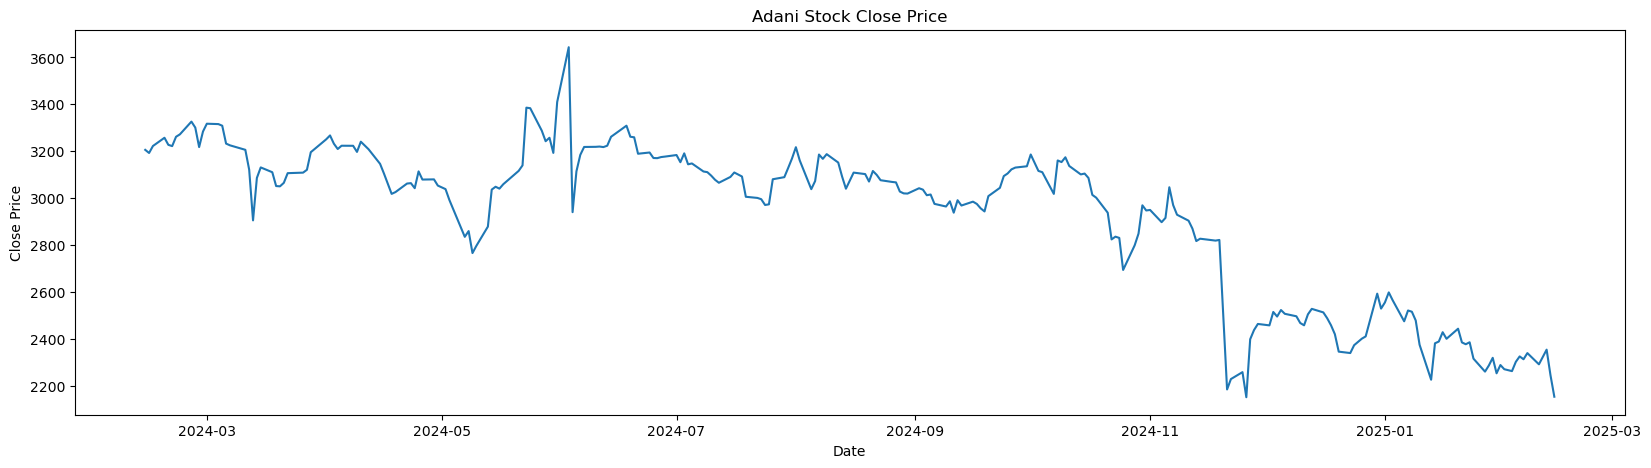

In [37]:
plt.figure(figsize = (20,5))
plt.plot(df['Close'])
plt.title("Adani Stock Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price')

Text(0, 0.5, 'Density')

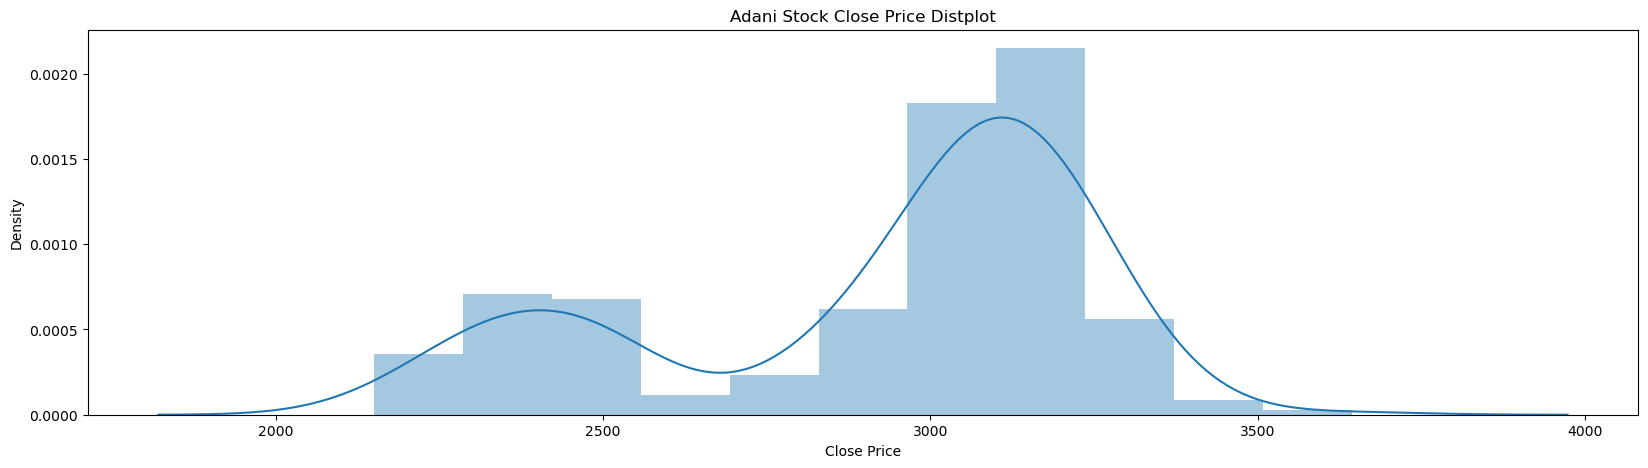

In [38]:
plt.figure(figsize = (20,5))
sns.distplot(df['Close'], kde = True)
plt.title("Adani Stock Close Price Distplot")
plt.xlabel('Close Price')
plt.ylabel('Density')

<hr style="border:1px solid black"> </hr>
A time series is also thought to include three systematic components: level, trend, and seasonality, as well as one non-systematic component termed noise.

The components' definitions are as follows:
- The **level** is the sum of all the values in a series.
- The **trend** is the upward or downward movement of the series' value.
- The series' short-term cycle is known as **seasonality**.
- **Noise** is the term for the random variation in the series.
------------------------------------
## Check for stationarity

Time series analysis only works with stationary data, so we must first determine **whether a series is stationary.**
Stationary time series is when the mean and variance are constant over time. It is easier to predict when the series is stationary.

**What does it mean for data to be stationary?**

- The mean of the series should not be a function of time. Because the mean increases over time, the red graph below is not stationary.

<img src="https://imgur.com/LjtBXwf.png">
- The variance of the series should not be a function of time. Homoscedasticity is the term for this characteristic. The varying spread of data over time can be seen in the red graph.

<img src="https://imgur.com/v2Uye7X.png">

- Finally, neither the I th term nor the (I + m) th term's covariance should be a function of time. As you can see in the graph below, the spread gets less as time goes on. As a result, the'red series' covariance does not remain constant throughout time.

<img src="https://i.imgur.com/6HVlvg2.png">

<hr style="border:1px solid black"> </hr>

### ADF (Augmented Dickey-Fuller) Test

The Dickey-Fuller test is one of the most extensively used statistical tests. It can be used to establish whether a series has a unit root and, as a result, whether the series is stationary. The null and alternate hypotheses for this test are:
Distinguish between point to point links and multi point links
**Null Hypothesis**: The series has a unit root (a =1).

**Alternative Hypothesis**: There is no unit root in the series.

The series is considered to be non-stationary if the null hypothesis is not rejected. As a result, the series can be linear or difference stationary.
If both the mean and standard deviation are flat lines, the series becomes stationary (constant mean and constant variance).

In [39]:
type(df['Close'])

pandas.core.series.Series

In [40]:
df['Close'].rolling(365).mean

<bound method Rolling.mean of Rolling [window=365,center=False,axis=0,method=single]>

Text(0, 0.5, 'Close Price')

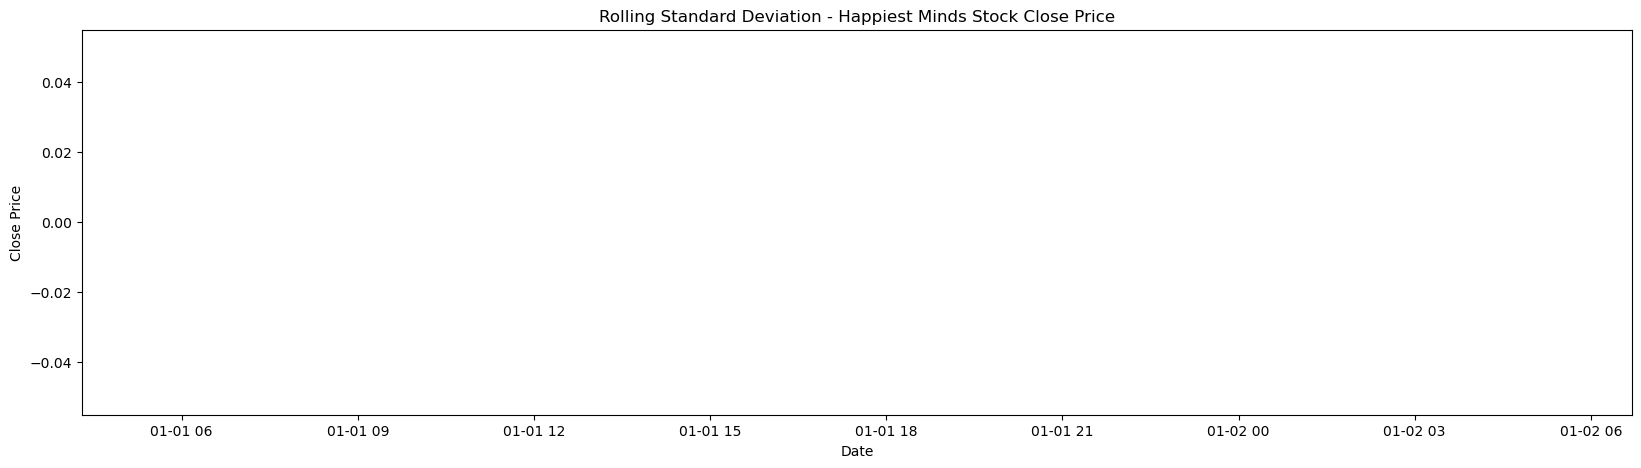

In [41]:
plt.figure(figsize = (20,5))
plt.plot(df['Close'].rolling(365).mean())
plt.title("Rolling Standard Deviation - Happiest Minds Stock Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price')

Text(0, 0.5, 'Close Price')

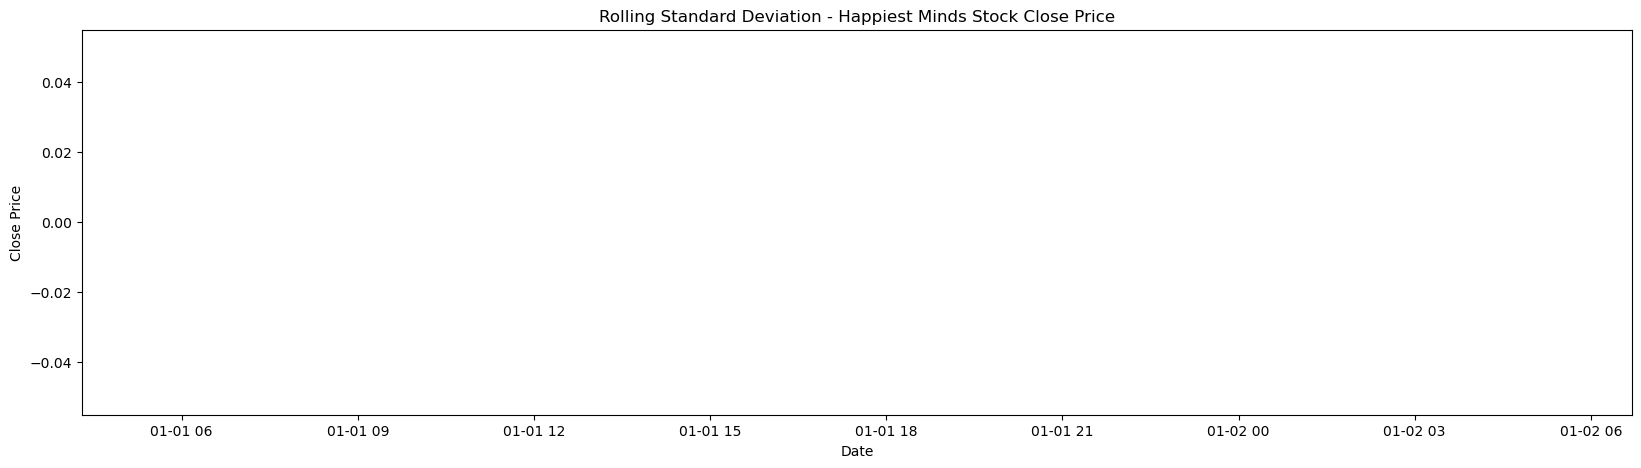

In [42]:
plt.figure(figsize = (20,5))
plt.plot(df['Close'].rolling(365).std())
plt.title("Rolling Standard Deviation - Happiest Minds Stock Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price')

In [43]:
#Checking stationary
adfuller(df['Close'],autolag='AIC')

(-0.8457404315817799,
 0.805315697669778,
 2,
 247,
 {'1%': -3.457105309726321,
  '5%': -2.873313676101283,
  '10%': -2.5730443824681606},
 2745.876839622258)

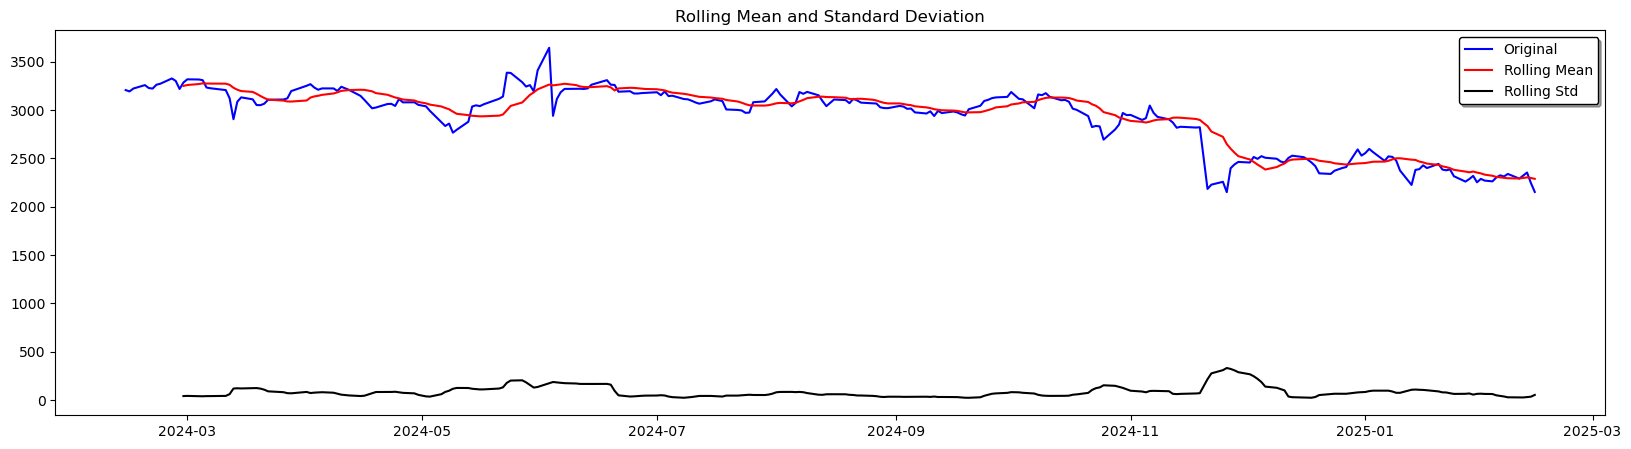


**************************************************
Results of dickey fuller test
Test Statistics                 -0.845740
p-value                          0.805316
No. of lags used                 2.000000
Number of observations used    247.000000
critical value (1%)             -3.457105
critical value (5%)             -2.873314
critical value (10%)            -2.573044
dtype: float64

**************************************************


In [44]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() # rolling mean of 12 days
    rolstd = timeseries.rolling(12).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (20,5))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best', shadow=True,edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show()
    print(f"\n{'*'*50}")
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    print(f"\n{'*'*50}")
# Function calling
test_stationarity(df['Close'])

<hr style="border:1px solid black"> </hr>
We can't reject the Null hypothesis because the p-value is bigger than 0.05. Furthermore, the test statistics exceed the critical values. As a result, the data is not stationary.

Differencing is a method of transforming a non-stationary time series into a stationary one. This is an important step in preparing data to be used in an ARIMA model.
So, to make the data stationary, we need to take the first-order difference of the data. Which is just another way of saying, subtract today’s close price from yesterday’s close price.


In [45]:
df_close=df['Close']

In [46]:
# Get the difference of each Adj Close point
hp_close_diff_1 = df_close.diff()

In [47]:
hp_close_diff_1

Date
2024-02-14 00:00:00+05:30           NaN
2024-02-15 00:00:00+05:30    -13.394531
2024-02-16 00:00:00+05:30     29.787842
2024-02-19 00:00:00+05:30     35.185791
2024-02-20 00:00:00+05:30    -30.187744
                                ...    
2025-02-10 00:00:00+05:30    -48.000000
2025-02-11 00:00:00+05:30     30.949951
2025-02-12 00:00:00+05:30     31.699951
2025-02-13 00:00:00+05:30   -108.750000
2025-02-14 00:00:00+05:30    -92.050049
Name: Close, Length: 250, dtype: float64

### **Do differencing until it converts into stationary data where mean and variance are constant**


In [48]:
hp_close_diff_1.dropna(inplace=True)

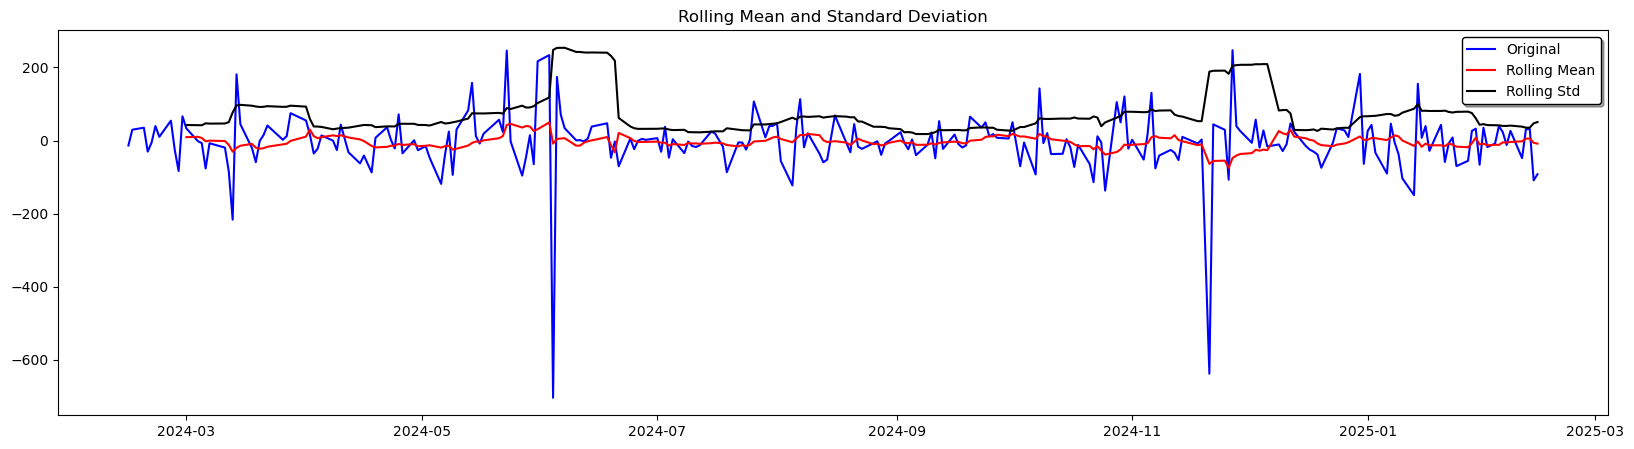


**************************************************
Results of dickey fuller test
Test Statistics               -1.378616e+01
p-value                        9.103800e-26
No. of lags used               1.000000e+00
Number of observations used    2.470000e+02
critical value (1%)           -3.457105e+00
critical value (5%)           -2.873314e+00
critical value (10%)          -2.573044e+00
dtype: float64

**************************************************


In [49]:
# Plot the tsla Adj Close 1st order difference
test_stationarity(hp_close_diff_1)

The p-value is obtained is less than significance level of 0.05 and the ADF statistic is lower than any of the critical values.

We can reject the null hypothesis. So, the time series is in fact stationary.

**Decompose the time series :**
To start with, we want to decompose the data to seperate the seasonality, trend and residual. Since we have 3 years of stock data. We would expect there's a yearly or weekly pattern. Let's use a function seasonal_decompose in statsmodels to help us find it.

## **Check the Trend, Seasonality and Residual**
* **Trend** — general movement over time
* **Seasonal** — behaviours captured in individual seasonal periods
* **Residual** — everything not captured by trend and seasonal components




**Additive vs. multiplicative time series components**
* There are two techniques for combining time series components:

**Additive**
* The term additive means individual components (trend, seasonality, and residual) are added together:
  * $y_t = T_t + S_t + R_t$
* An additive trend indicates a linear trend, and an additive seasonality indicates the same frequency (width) and amplitude (height) of seasonal cycles

**Multiplicative**
* The term multiplicative means individual components (trend, seasonality, and residuals) are multiplied together:
  * $y_t = T_t + S_t + R_t$
* A multiplicative trend indicates a non-linear trend (curved trend line), and a multiplicative seasonality indicates increasing/decreasing frequency (width) and/or amplitude (height) of seasonal cycles


**Both trend and seasonality can be additive or multiplicative, which means there are four ways these can be combined:**

* Additive trend and additive seasonality
  * Additive trend means the trend is linear (straight line), and additive seasonality means there aren’t any changes to widths or heights of seasonal periods over time
* Additive trend and multiplicative seasonality
  * Additive trend means the trend is linear (straight line), and multiplicative seasonality means there are changes to widths or heights of seasonal periods over time
* Multiplicative trend and additive seasonality
  * Multiplicative trend means the trend is not linear (curved line), and additive seasonality means there aren’t any changes to widths or heights of seasonal periods over time
* Multiplicative trend and multiplicative seasonality
  * Multiplicative trend means the trend is not linear (curved line), and multiplicative seasonality means there are changes to widths or heights of seasonal periods over time

**The seasonal_decompose() function from statsmodels excepts at least two parameters:**

* x: array — your time series.
* model: str — type of seasonal component, can be either additive or multiplicative. The default value is additive.

**Additive Model**

In [50]:
result=seasonal_decompose(df[["Close"]],period = 30)

<Figure size 2000x1000 with 0 Axes>

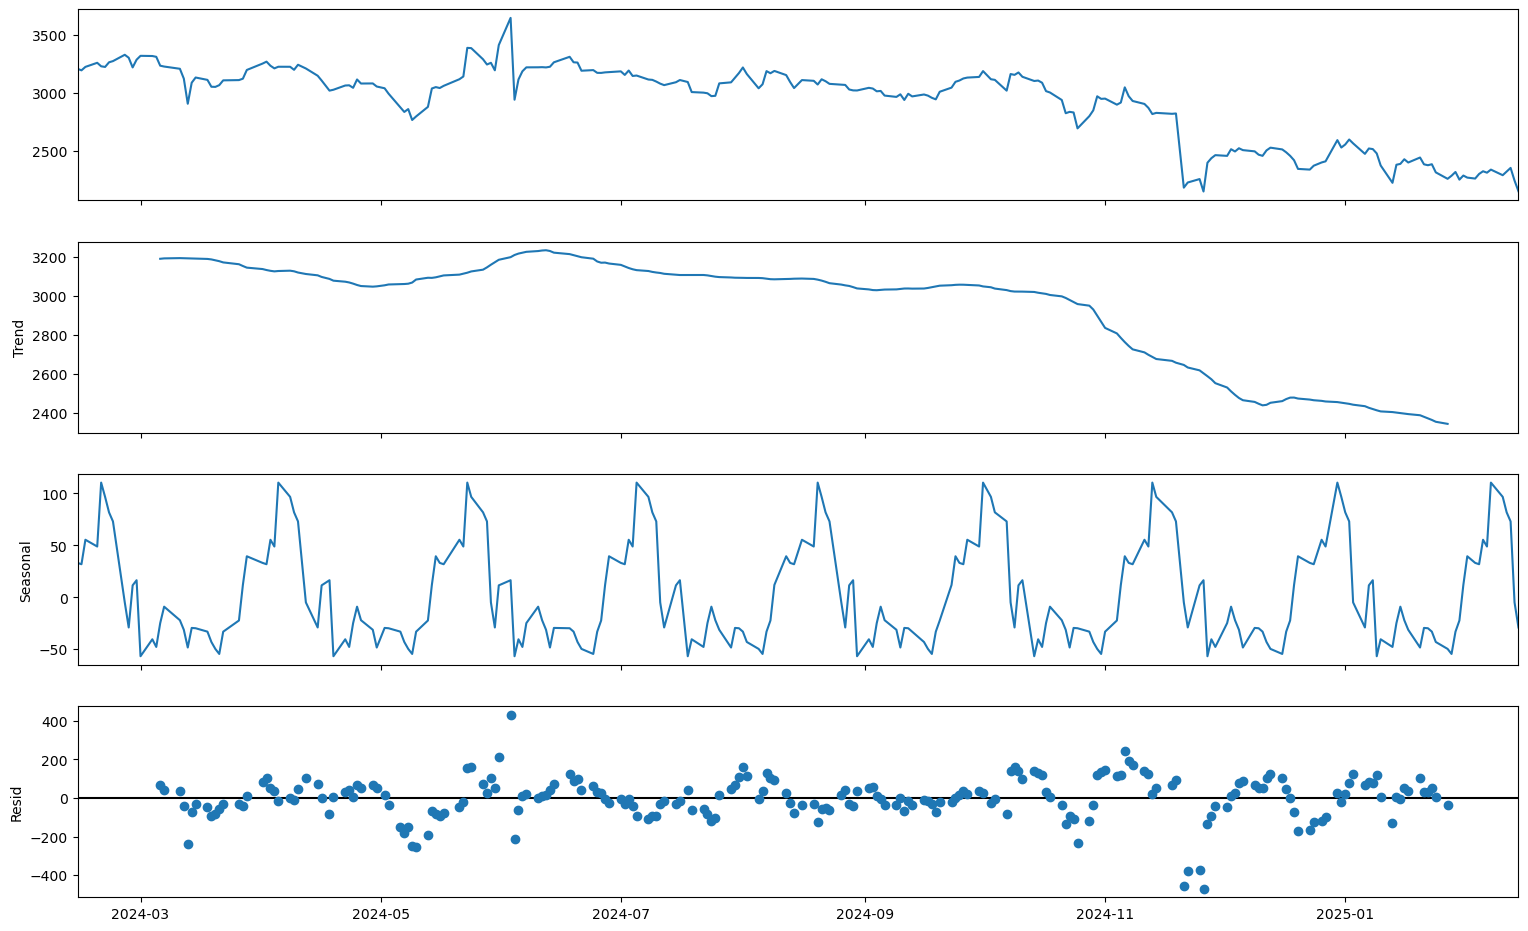

In [51]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

**Multiplicative Model**

In [52]:
len(df[["Close"]])

250

<Figure size 1440x720 with 0 Axes>

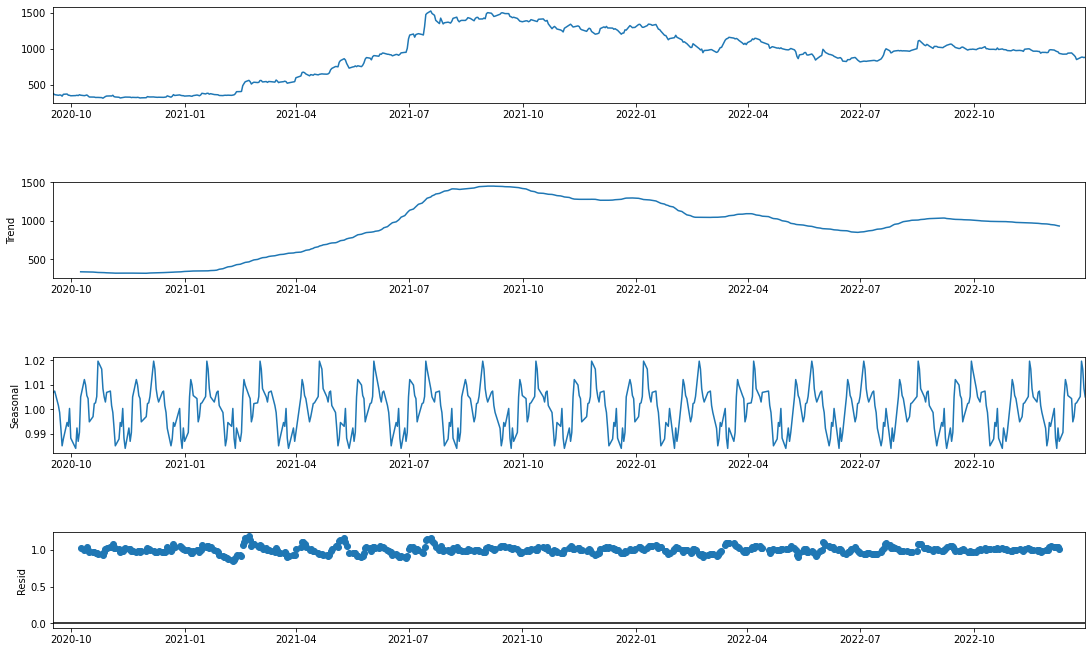

In [27]:
result=seasonal_decompose(stock_data[["Close"]],model="multiplicative",period = 30)
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

**Now we'll create an ARIMA model and train it using the train data's stock closing price. So, let’s visualize the data by dividing it into training and test sets**

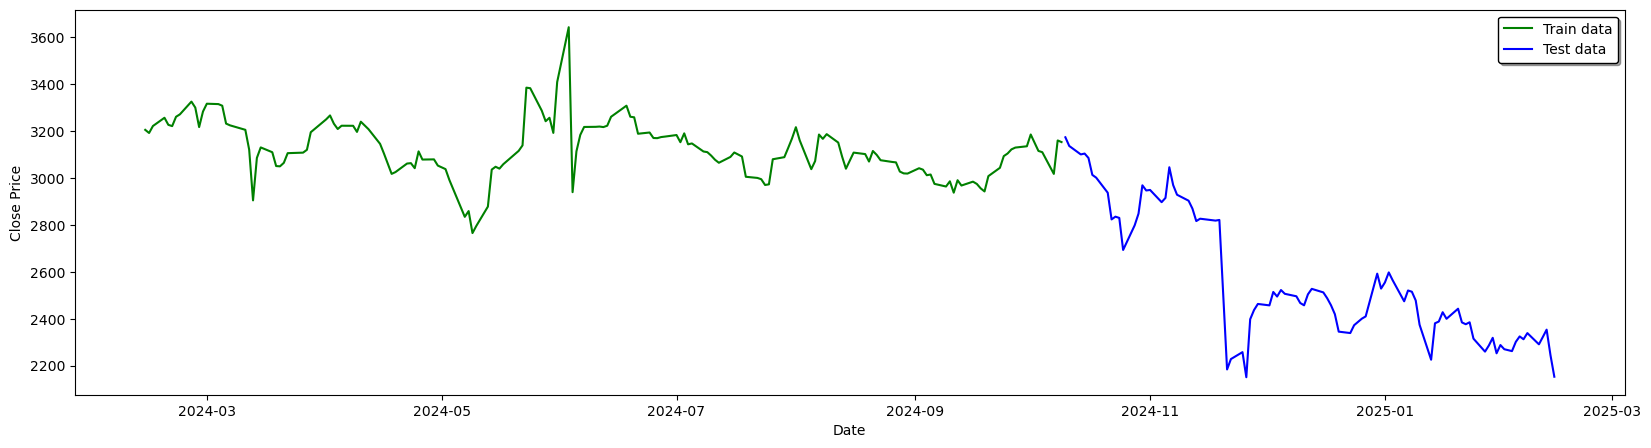

In [53]:
#split data into train and training set
train_data=df_close[0:-90]
test_data=df_close[-90:]
plt.figure(figsize=(20,5))
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train_data, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend( shadow=True,edgecolor = 'k')

## **Auto Correlation and Partial Auto Correlation**

**From correlation to autocorrelation**
* Both terms are tightly connected. Correlation measures the strength of the linear relationship between two sequences:
  * The closer the correlation to +1, the stronger the positive linear relationship
  * The closer the correlation to -1, the stronger the negative linear relationship
  * The closer the correlation to 0, the weaker the linear relationship

* Autocorrelation is the same, but with a twist — you’ll calculate a correlation between a sequence with itself lagged by some number of time units
  * Before calculating autocorrelation, you should make the time series stationary (the mean, variance, and covariance shouldn’t change over time)

**Auto-correlations**

After a time series has been stationarized by differencing, the next step in fitting an ARIMA model is to determine whether AR or MA terms are needed to correct any autocorrelation that remains in the differenced series. 

By looking at the autocorrelation function (ACF) and partial autocorrelation (PACF) plots of the differenced series, you can tentatively identify the numbers of AR and/or MA terms that are needed.

**Partial autocorrelation**
* This one is a bit tougher to understand. It does the same as regular autocorrelation — shows the correlation of a sequence with itself lagged by some number of time units. But there’s a twist. Only the direct effect is shown, and all intermediary effects are removed.

* For example, you want to know the direct relationship between the stock price today and 12 months ago. You don’t care about anything in between

-------------------------------------
- **Autocorrelation function plot (ACF):**
Autocorrelation refers to how correlated a time series is with its past values whereas the ACF is the plot used to see the correlation between the points, up to and including the lag unit. In ACF, the correlation coefficient is in the x-axis whereas the number of lags is shown in the y-axis.

Normally, we employ either the AR term or the MA term in an ARIMA model. Both of these phrases are rarely used on rare occasions. The ACF plot is used to determine which of these terms we should utilise for our time series.
 - If the autocorrelation at lag 1 is positive, we utilise the AR model.
 - If the autocorrelation at lag 1 is negative, we employ the MA model.

We move on to Partial Autocorrelation function plots (PACF) after plotting the ACF plot.

------------------------------
- **Partial Autocorrelation function plots (PACF)**
A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed. The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

If the PACF plot drops off at lag n, then use an AR(n) model and if the drop in PACF is more gradual then we use the MA term.

Use AR terms in the model when the
- ACF plots show autocorrelation decaying towards zero
- PACF plot cuts off quickly towards zero
- ACF of a stationary series shows positive at lag-1

Use MA terms in the model when the model is
- Negatively Autocorrelated at Lag — 1
- ACF that drops sharply after a few lags
- PACF decreases more gradually

<hr style="border:1px solid black"> </hr>

**How to interpret ACF and PACF plots**
* Time series models you’ll soon learn about, such as Auto Regression (AR), Moving Averages (MA), or their combinations (ARMA), require you to specify one or more parameters. These can be obtained by looking at ACF and PACF plots.

* In a nutshell:
  * If the ACF plot declines gradually and the PACF drops instantly, use Auto Regressive model.
  * If the ACF plot drops instantly and the PACF declines gradually, use Moving Average model.
  * If both ACF and PACF decline gradually, combine Auto Regressive and Moving Average models (ARMA).
  * If both ACF and PACF drop instantly (no significant lags), it’s likely you won’t be able to model the time series.

In [54]:
# Calculate autocorrelation
acf_values = acf(hp_close_diff_1)
np.round(acf_values,2)

array([ 1.  , -0.15, -0.13,  0.06, -0.06, -0.04,  0.07,  0.01, -0.14,
       -0.05, -0.03,  0.02, -0.02,  0.02, -0.05, -0.04, -0.04,  0.08,
       -0.01, -0.01,  0.06,  0.06,  0.01, -0.03])

In [55]:
# Calculate partial autocorrelation
acf_values = pacf(hp_close_diff_1)
np.round(acf_values,2)

array([ 1.  , -0.15, -0.15,  0.01, -0.07, -0.05,  0.04,  0.03, -0.13,
       -0.1 , -0.1 , -0.01, -0.06, -0.01, -0.07, -0.06, -0.11,  0.02,
       -0.04, -0.02,  0.03,  0.09,  0.05, -0.03])

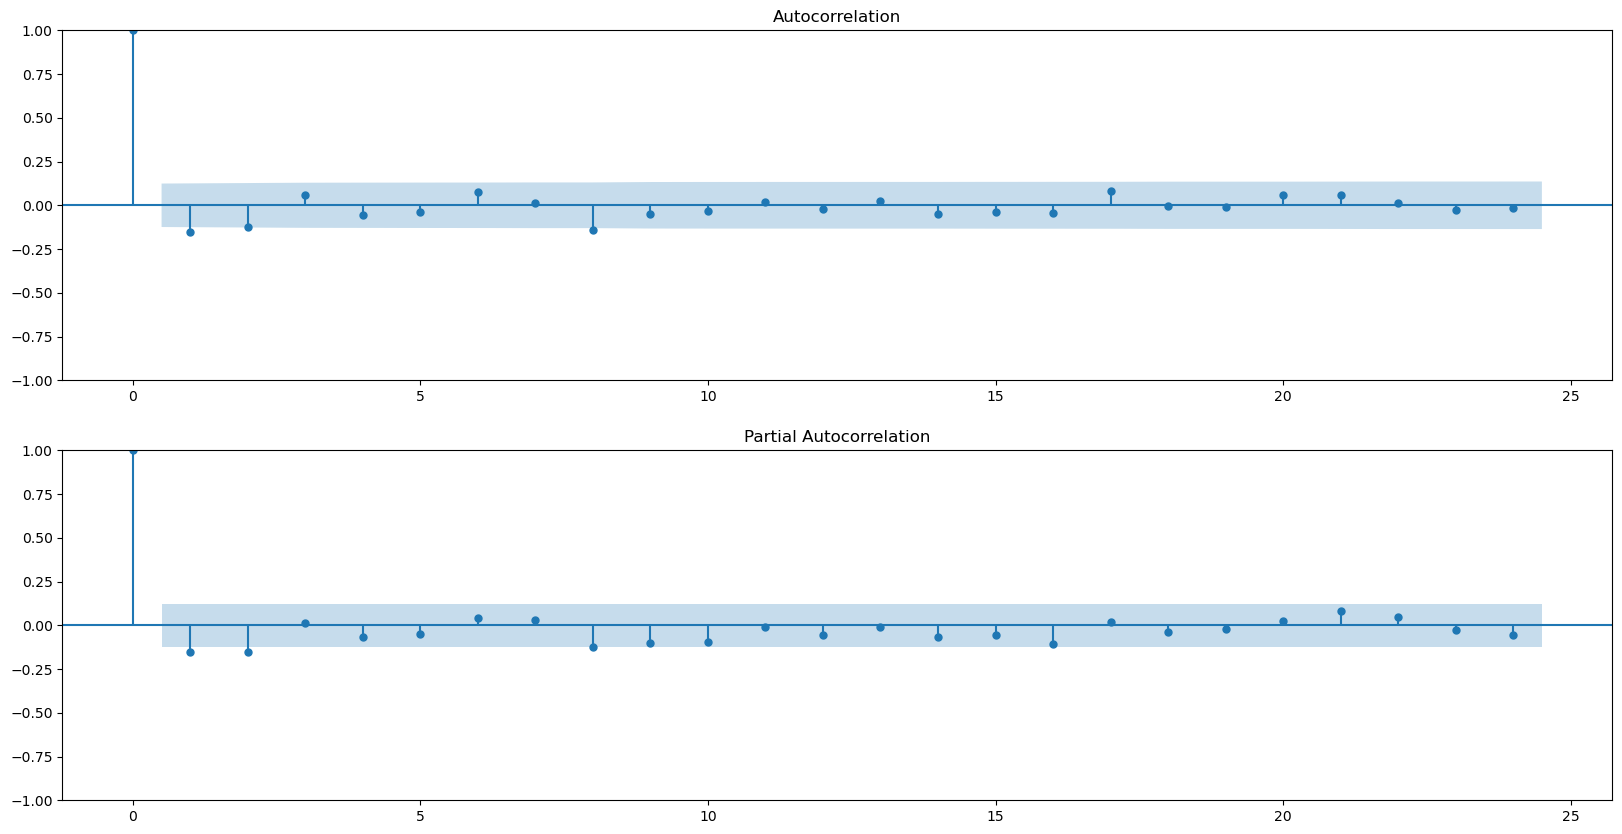

In [56]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(211)#function
fig = plot_acf(hp_close_diff_1, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(hp_close_diff_1, ax=ax2)

- To estimate the amount of AR terms(**p**), you need to look at the PACF plot. First, ignore the value at lag 0. It will always show a perfect correlation, since we are estimating the correlation between today’s value with **itself**. Note that there is a coloured area in the plot, representing the confidence interval. To estimate how much AR terms you should use, start counting how many spikes are above or below the confidence interval before the next one enter the coloured area. So, looking at the PACF plot above, we can estimate to use 0 AR terms for our model, since no any spikes are out of the confidence interval.

---------------------------------------

- To calculate **d**, all you need to know how many differencing was used to make the series stationary. In our case, we have used order of 1st order differencing to make our data stationary.

---------------------------------------

- To estimate the amount of MA terms (**q**), this time you will look at ACF plot. The same logic is applied here: how many spikes are above or below the confidence interval before the next spike enters the coloured area? Here, we can estimate 0 MA terms, since no spike is out of the confidence interval.

So, we will use (0,1,0) order to fit ARIMA model.

We can also use different orders of p, d and q to get the best order with lowest AIC.

In [57]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [58]:
# evaluate different combinations of p, d and q values for an ARIMA model to get the best order for ARIMA Model
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


In [59]:
evaluate_arima_model(train_data, test_data, (0,1,0))

92.51746558909929

In [60]:
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=527.758
ARIMA(0, 0, 1) RMSE=304.425
ARIMA(0, 0, 2) RMSE=227.473
ARIMA(0, 1, 0) RMSE=92.517
ARIMA(0, 1, 1) RMSE=94.321
ARIMA(0, 1, 2) RMSE=94.792
ARIMA(0, 2, 0) RMSE=135.368
ARIMA(0, 2, 1) RMSE=92.511
ARIMA(0, 2, 2) RMSE=94.144
ARIMA(1, 0, 0) RMSE=101.326
ARIMA(1, 0, 1) RMSE=100.173
ARIMA(1, 0, 2) RMSE=99.884
ARIMA(1, 1, 0) RMSE=92.839
ARIMA(1, 1, 1) RMSE=94.396
ARIMA(1, 1, 2) RMSE=94.930
ARIMA(1, 2, 0) RMSE=116.841
ARIMA(1, 2, 1) RMSE=92.764
ARIMA(1, 2, 2) RMSE=92.834
ARIMA(2, 0, 0) RMSE=100.387
ARIMA(2, 0, 1) RMSE=100.521
ARIMA(2, 0, 2) RMSE=100.365
ARIMA(2, 1, 0) RMSE=94.425
ARIMA(2, 1, 1) RMSE=95.179
ARIMA(2, 1, 2) RMSE=95.650
ARIMA(2, 2, 0) RMSE=105.859
ARIMA(2, 2, 1) RMSE=94.102
ARIMA(2, 2, 2) RMSE=94.998
Best ARIMA(0, 2, 1) RMSE=92.511


In [62]:
# As there sis very less difference between RMSE of (1,0,0) and (0,1,0). SO, we will take (0,1,0)
arima_order=(1,0,1)
model = ARIMA(train_data, order=arima_order)
model_fit = model.fit()

In [63]:
yhat = model_fit.summary()
yhat

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  160
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -922.151
Date:                Sun, 16 Feb 2025   AIC                           1852.302
Time:                        11:17:58   BIC                           1864.603
Sample:                             0   HQIC                          1857.297
                                - 160                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3125.6313     38.716     80.732      0.000    3049.749    3201.513
ar.L1          0.8521      0.065     13.099      0.000       0.725       0.980
ma.L1         -0.2154      0.103     -2.099      0.036      -0.417      -0.014
sigma2      5902.5557    303.913     19.422      0.000    5306.897    6498.215
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):              2348.85
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                            -1.75
Prob(H) (two-sided):                  0.08   Kurtosis:                        21.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

From both the method, we get the same order (0,1,0)

In [64]:
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = ARIMA(train_data,order=(1,0,1))
    model_fit = model.fit()
    fc = model_fit.predict(start= 0, end = len(train_data)+len(test_data)-1)
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions[0][len(train_data):])))

RMSE of ARIMA Model: 628.7811592952722


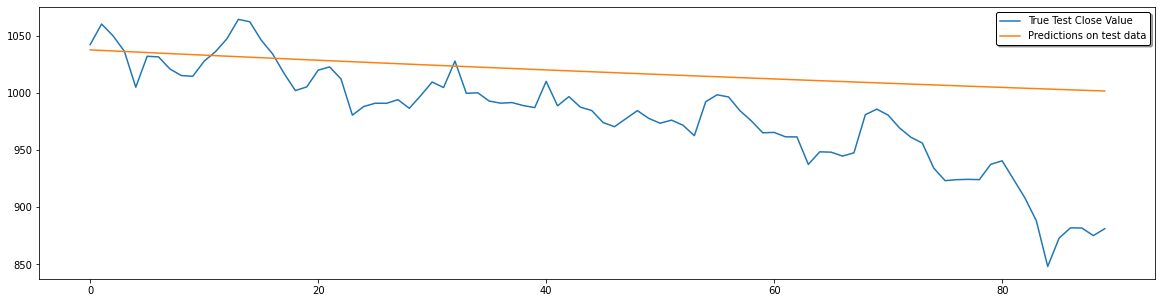

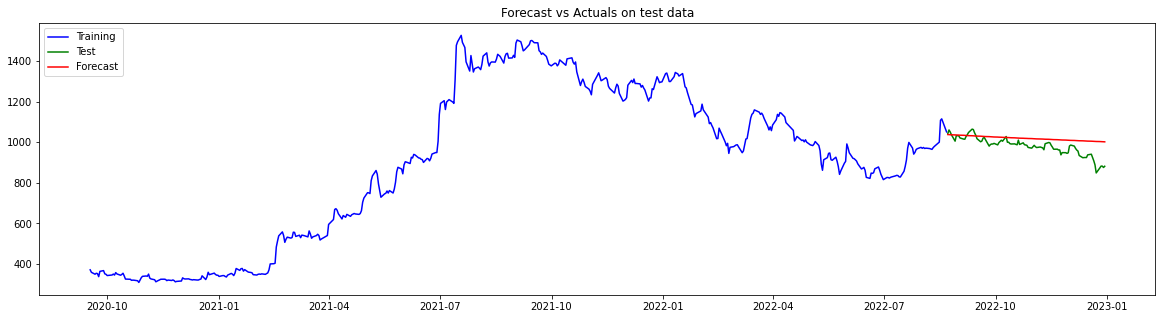

In [39]:
plt.figure(figsize=(20,5))
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value')
plt.plot(range(len(predictions[0][len(train_data):])), predictions[0][len(train_data):], label = 'Predictions on test data')
plt.legend(shadow=True,edgecolor = 'k')
plt.show()

fc_series = pd.DataFrame(predictions[0][len(train_data):])
fc_series.index = test_data.index

# Plot
plt.figure(figsize=(20,5))
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green')
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left')
plt.show()

# Forecasting for next 60 days

In [67]:
import statsmodels
statsmodels.__version__

'0.14.0'

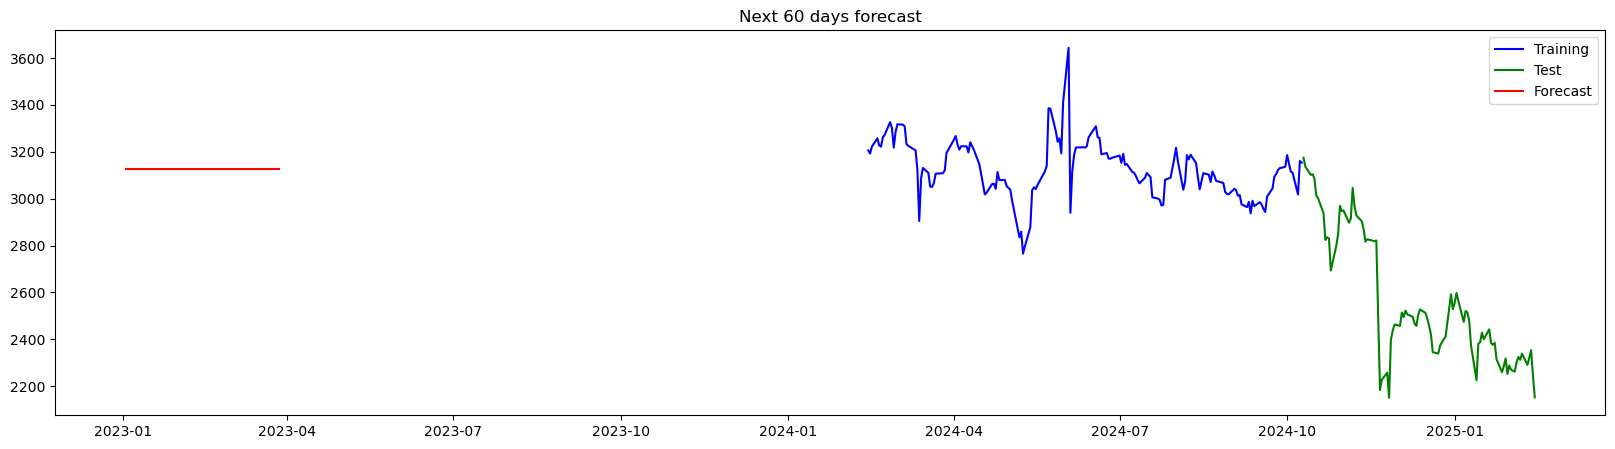

In [68]:
# Creating next 60 days date excluding holiday and weekend as stock market remains off on weekend and holidays
next_60_days_date = pd.bdate_range(
    '2023/1/1',
    '2023/3/27', 
    freq='C', 
    weekmask='Mon Tue Wed Thu Fri',
    holidays=[pd.Timestamp('2023-01-26')]  # Changed pd.datetime to pd.Timestamp
)

# Rest of your code remains the same
next_60_days_forecast = model_fit.predict(start=0, end=len(train_data)+len(test_data)-1+60)
next_60_days_forecast = pd.DataFrame(next_60_days_forecast[len(train_data)+len(test_data):])
next_60_days_forecast.index = next_60_days_date

# Plot
plt.figure(figsize=(20,5))
plt.plot(train_data, label='Training', color='blue')
plt.plot(test_data, label='Test', color='green')
plt.plot(next_60_days_forecast, label='Forecast', color='red')
plt.title('Next 60 days forecast')
plt.legend(loc='upper right')
plt.show()

Although our model is on average side but this model has trouble forecasting long-term data. This is possible because ARIMA is a sensitive algorithm and not a broad algorithm for predicting. Stock data, on the other hand, rarely show seasonality that can be detected using the ARIMA model.
Forecasting is thought to be easier if there is a visible or hidden pattern that repeats itself throughout time. 
Stock prices, on the other hand, are far too complicated to be modelled. There are so may external and dynamic factor affecting the price.


<hr style="border:1px solid black"> </hr>
**A problem with ARIMA is that it does not support seasonal data. That is a time series with a repeating cycle.
ARIMA expects data that is either not seasonal or has the seasonal component removed, e.g. seasonally adjusted via methods such as seasonal differencing.**

#  Introduction to SARIMA Models

SARIMA (Seasonal ARIMA) is a modification of ARIMA that explicitly allows univariate time series data with a seasonal component. SARIMA accepts an additional set of parameters (P,D,Q)m that specify the model's seasonal components.

- P: Seasonal auto regressive order
- D: Seasonal difference order
- Q: Seasonal moving average order
- m: The number of time steps for a single seasonal period

This is written as (p,d,q)×(P,D,Q)m.

- From the ACF and PACF that we have plotted, we can determine the value of Seasonal (P,D,Q).
    In ACF and PACF, we have one spike at lag 3 that is out of confidence interval and also there is no significant correlation at lag 3 and lag 6. So, the order of P and Q is (1, 1).
    As we have used differencing of 1 to make data stationary so, D = 1. So, the best order for SARIMA is(0,1,0)x(1,1,1)3

In [42]:
# train_data=tsla_close_diff_1[0:-60]
# test_data=tsla_close_diff_1[-60:]

In [2]:
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

NameError: name 'train_data' is not defined

In [71]:
len(test_data)

90

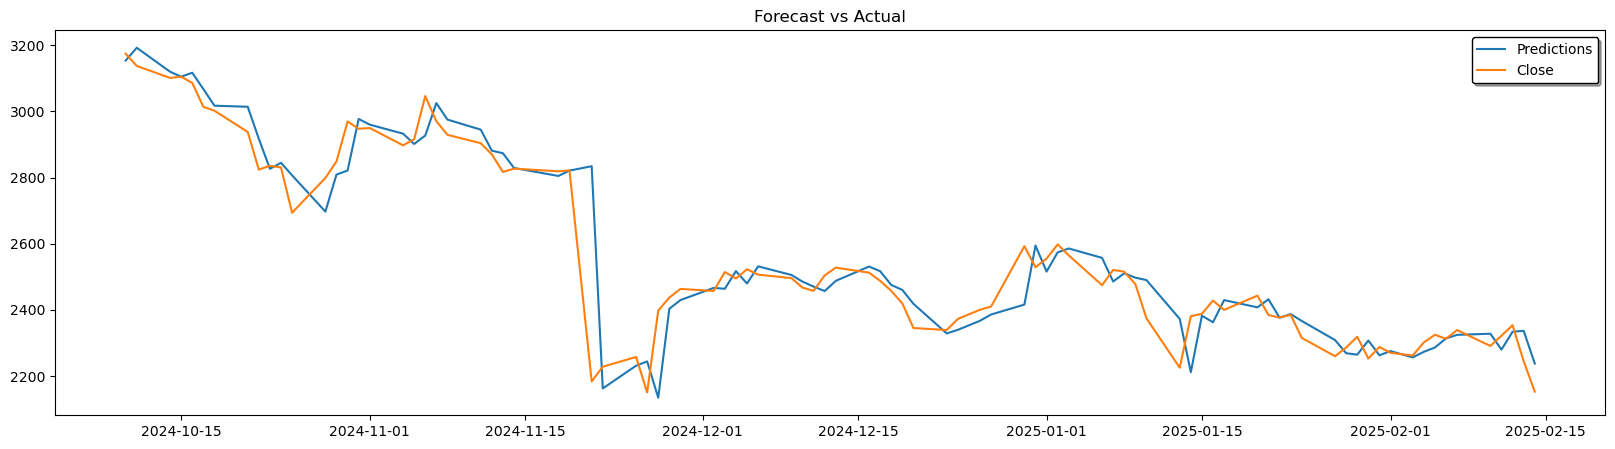

In [72]:
plt.figure(figsize=(20,5))
plt.title('Forecast vs Actual')
plt.plot(test_data.index, predictions, label = 'Predictions')
plt.plot(test_data.index, test_data, label = 'Close')
plt.legend(shadow=True,edgecolor = 'k')

## Auto ARIMA

Automatically discover the optimal order for an ARIMA model.
After identifying the most optimal parameters for an ARIMA model, the auto arima function provides a fitted ARIMA model. This function is based on the commonly used forecast::auto. Arima R function.

The auro arima function fits models within the start p, max p, start q, max q ranges using differencing tests (e.g., Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey–Fuller, or Phillips–Perron) to identify the order of differencing, d. If the seasonal option is enabled, D, auto arima additionally aims to identify the ideal P and Q hyper-parameters after doing the Canova-Hansen to determine the optimal order of seasonal differencing.

In [1]:
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model_autoARIMA = auto_arima(history, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   
                      start_P=0, 
                      D=0, 
                      trace=False,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
    fc, confint = model_autoARIMA.predict(n_periods=1, return_conf_int=True)
    predictions.append(fc)
    history.append(test_data[t])
    conf_list.append(confint)

print('RMSE of Auto ARIMA Model :', np.sqrt(mean_squared_error(test_data, predictions)))
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

NameError: name 'train_data' is not defined

**Top left**: The residual errors appear to have a uniform variance and fluctuate around a mean of zero.

**Top Right**: The density plot on the top right suggests a normal distribution with a mean of zero.

**Bottom left**: The red line should be perfectly aligned with all of the dots. Any significant deviations would indicate a skewed distribution.

**Bottom Right**: The residual errors are not autocorrelated, as shown by the Correlogram, also known as the ACF plot. Any autocorrelation would imply that the residual errors have a pattern that isn’t explained by the model. As a result, you’ll need to add more Xs (predictors) to the model.

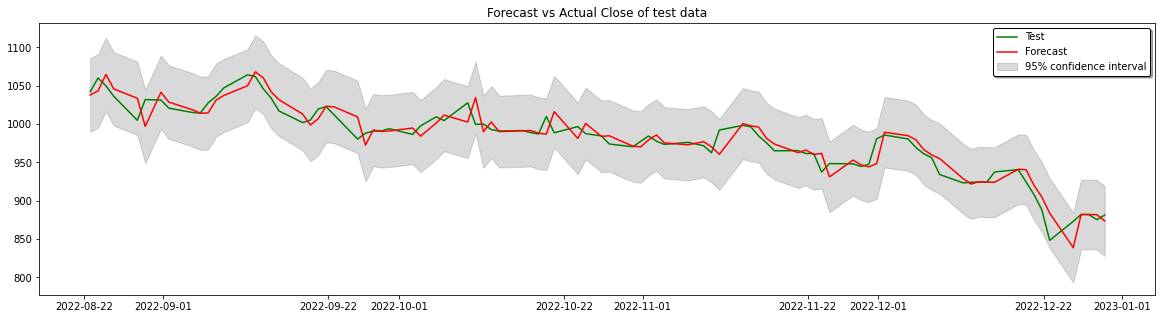

In [47]:
lower_series = []
upper_series = []
for i in conf_list:
    lower_series.append(i[0][0])
    upper_series.append(i[0][1])
fc_series = pd.Series(predictions, index=test_data.index)
lower_series = pd.Series(lower_series, index=test_data.index)
upper_series = pd.Series(upper_series, index=test_data.index)

# Plot
plt.figure(figsize=(20,5))
# plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green')
plt.plot(fc_series, label='Forecast', color = 'red')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15, label = '95% confidence interval')
plt.title('Forecast vs Actual Close of test data')
plt.legend( shadow=True,edgecolor = 'k')
plt.show()

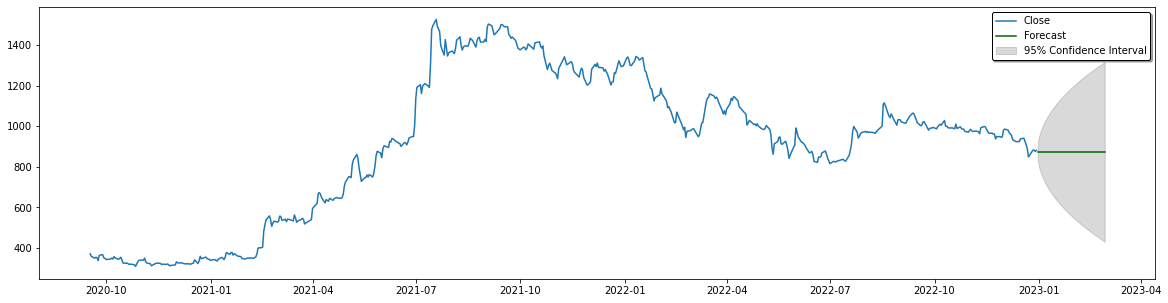

In [48]:
fc, confint = model_autoARIMA.predict(n_periods=60, return_conf_int=True)

# make series for plotting purpose
fc_series = pd.Series(fc, index=pd.date_range(start='31/12/2022', periods=60))
lower_series = pd.Series(confint[:, 0], index=pd.date_range(start='31/12/2022', periods=60))
upper_series = pd.Series(confint[:, 1], index=pd.date_range(start='31/12/2022', periods=60))

# Plot
plt.figure(figsize = (20,5))
plt.plot(df_close, label = 'Close')
plt.plot(fc_series, color='darkgreen', label = 'Forecast')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15, label = '95% Confidence Interval')
plt.legend(shadow=True,edgecolor = 'k')
plt.show()

In [12]:
!pip install streamlit fbprophet yfinance plotly

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for cmdstanpy==0.9.5 from https://files.pythonhosted.org/packages/e3/e2/204c9c6beaf9e05ad28bd589c154afff35dffa6166d76841d3c0dec6c1e3/cmdstanpy-0.9.5-py3-none-any.whl.metadata
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Obtaining dependency information for pystan>=2.14 from https://files.pythonhosted.org/packages/3f/7f/657d722f81035931513a9760751a215f09fb1474c15c043b5a5ed17e61ca/pystan-3.10.0-py3-none-any.whl.metadata
  Using cached pystan-3.10.0-py3-none-any.whl.metadata (3.7 kB)
  Obtaining dependency information for LunarCalendar>=0.0.9 from https://files.pythonhosted.org/packages/ab/e0/a52ffc02395474858552ca6437226e23ad67e25fd85cb387f02e479cfe01/LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Obtaining 

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [58 lines of output]
  C:\Users\10xTc_Lap-5\AppData\Local\Temp\pip-install-6u5wcj_7\fbprophet_5db814a7b0a8432ba223f345029abe5d\setup.py:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
    from pkg_resources import (
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  NumExpr defaulting to 8 threads.
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\10xTc_Lap-5\AppData\Local\Temp\pip-install-6u5wcj_7\fbprophet_5db814a7b0a8432ba223f345029abe5d\setup.py", line 122, in <module>
      setup(
    File "C:\Users\10xTc_Lap-5\anaconda5\Lib\site-packages\setuptools\__init__.py", line 107, 

  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\geometry\algorithms\detail\envelope\range.hpp -> build\lib.win-amd64-cpython-311\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\geometry\algorithms\detail\envelope
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\geometry\algorithms\detail\envelope\range_of_boxes.hpp -> build\lib.win-amd64-cpython-311\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\geometry\algorithms\detail\envelope
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\geometry\algorithms\detail\envelope\segment.hpp -> build\lib.win-amd64-cpython-311\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\geometry\algorithms\detail\envelope
  copying pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\geometry\algorithms\detail\envelope\transform_units.hpp -> build\lib.win-amd64-cpython-311\pystan\stan\lib\stan_math\lib\boost_1.69.0\boost\geometry\algorithms\detail\envelope
  creating build\lib.win-amd64-cpython-311\pystan\stan\lib\stan_math\lib\boost_

In [ ]:
%%writefile stock.py
import streamlit as st
from datetime import date

import yfinance as yf
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from plotly import graph_objs as go

START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

st.title('Stock Forecast App')

stocks = ('GOOG', 'AAPL', 'MSFT', 'GME')
selected_stock = st.selectbox('Select dataset for prediction', stocks)

n_years = st.slider('Years of prediction:', 1, 4)
period = n_years * 365


@st.cache
def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

	
data_load_state = st.text('Loading data...')
data = load_data(selected_stock)
data_load_state.text('Loading data... done!')

st.subheader('Raw data')
st.write(data.tail())

# Plot raw data
def plot_raw_data():
	fig = go.Figure()
	fig.add_trace(go.Scatter(x=data['Date'], y=data['Open'], name="stock_open"))
	fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], name="stock_close"))
	fig.layout.update(title_text='Time Series data with Rangeslider', xaxis_rangeslider_visible=True)
	st.plotly_chart(fig)
	
plot_raw_data()

# Predict forecast with Prophet.
df_train = data[['Date','Close']]
df_train = df_train.rename(columns={"Date": "ds", "Close": "y"})

m = Prophet()
m.fit(df_train)
future = m.make_future_dataframe(periods=period)
forecast = m.predict(future)

# Show and plot forecast
st.subheader('Forecast data')
st.write(forecast.tail())
    
st.write(f'Forecast plot for {n_years} years')
fig1 = plot_plotly(m, forecast)
st.plotly_chart(fig1)

st.write("Forecast components")
fig2 = m.plot_components(forecast)
st.write(fig2)

# **THE END**